# (Core) Preparing Time Series from Wide-Form Data
You will be working with Zillow's publicly available Zillow House Value Index (ZHVI) https://www.zillow.com/research/data/

- Specifically, you will be using the Home Value data set for:
    - Data Type = "ZHVI All Homes (SFR+Condo/Coop) - Time Series - Smoothed - Seasonally Adjusted"
    - Geography = "City"
- We have already downloaded the file for you and uploaded it to Google Drive.
    - Share URL: https://drive.google.com/file/d/1O_g44QAfe3uVF-1heAC0BAeVDoWloVR-/view?usp=sharing
    - Direct URL (for Pandas): https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv

In [57]:
import pandas as pd
from math import log10, floor
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
file = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv'
df = pd.read_csv(file)
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22467 entries, 0 to 22466
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 48.2+ MB


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0


# Part 1
- First, you will prepare the dataset for time series analysis:
     - Load in the Zillow Home Value Index dataframe.
        - Note: it is a large file and may take a minute to load.
- Filter the 4 largest cities into a new dataframe.
    - Tip: the "SizeRank" column has already ranked the cities by size. The larger the city, the smaller the rank value.
        - Therefore the 4 largest cities would have rank values of [0,1,2,3]
- Melt the data to long-form and prepare it for time series analysis.
    - Convert the melted dates into datetime datatype.
    - Make the datetime column the index.
- Resample the dataframe as monthly frequency, grouped by City.


In [36]:
# filter 4 largest cities
largest = df[df['SizeRank'] < 4]
largest

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [37]:
# melt data
cols_to_keep = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 
                'StateName', 'State', 'Metro', 'CountyName']

melted = pd.melt(largest, cols_to_keep, 
                 value_name = 'HomeValue', var_name = 'Date')
melted.info()
melted.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    1092 non-null   int64  
 1   SizeRank    1092 non-null   int64  
 2   RegionName  1092 non-null   object 
 3   RegionType  1092 non-null   object 
 4   StateName   1092 non-null   object 
 5   State       1092 non-null   object 
 6   Metro       1092 non-null   object 
 7   CountyName  1092 non-null   object 
 8   Date        1092 non-null   object 
 9   HomeValue   1087 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 85.4+ KB


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,HomeValue
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0


In [38]:
# convert datetime dtype
melted['Date'] = pd.to_datetime(melted['Date'])
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionID    1092 non-null   int64         
 1   SizeRank    1092 non-null   int64         
 2   RegionName  1092 non-null   object        
 3   RegionType  1092 non-null   object        
 4   StateName   1092 non-null   object        
 5   State       1092 non-null   object        
 6   Metro       1092 non-null   object        
 7   CountyName  1092 non-null   object        
 8   Date        1092 non-null   datetime64[ns]
 9   HomeValue   1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 85.4+ KB


In [39]:
# set as index
melted = melted.set_index('Date')
melted.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,HomeValue
Date,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0


In [40]:
# resample
melted_df = melted.groupby('RegionName').resample('MS').sum()
melted_df = melted_df.drop(columns = ['RegionID', 'SizeRank'])
melted_df

HomeValue
RegionName Date                 
Chicago    2000-01-01   166139.0
           2000-02-01   166536.0
           2000-03-01   167368.0
           2000-04-01   168826.0
           2000-05-01   170499.0
...                          ...
New York   2022-05-01   768797.0
           2022-06-01   773944.0
           2022-07-01   777692.0
           2022-08-01   779960.0
           2022-09-01   781622.0

[1092 rows x 1 columns]

# Part 2
- Once you've prepared the dataframe with the time series data for the 4 largest cities:
    - Plot the home values for all 4 cities. (Hint: use unstack)
        - Make sure to add a title and axis labels.
        - Reformat the y-axis ticks to use thousands of dollars with a "K" at the end. (e.g. "200K, 400K, etc")
            - Hint: use the FuncFormatter from matplotlib.


In [42]:
unstacked_df = melted_df.unstack(level = 0)
unstacked_df

HomeValue                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2000-01-01  166139.0  109068.0    234181.0  253690.0
2000-02-01  166536.0  109079.0    234401.0  255517.0
2000-03-01  167368.0  108878.0    235513.0  257207.0
2000-04-01  168826.0  108881.0    237589.0  260310.0
2000-05-01  170499.0  108834.0    240113.0  263204.0
...              ...       ...         ...       ...
2022-05-01  312487.0  265558.0    990391.0  768797.0
2022-06-01  314663.0  268901.0    992337.0  773944.0
2022-07-01  315910.0  271059.0    992630.0  777692.0
2022-08-01  315587.0  272400.0    978196.0  779960.0
2022-09-01  315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

In [62]:
def format_func(value, tick_number = None):
    num_thousands = 0 if abs(value) < 1000 else floor (log10(abs(value))/3)
    value = round(value / 1000 ** num_thousands, 2)
    return f'{value : g}'+' KMGTPEZY'[num_thousands]

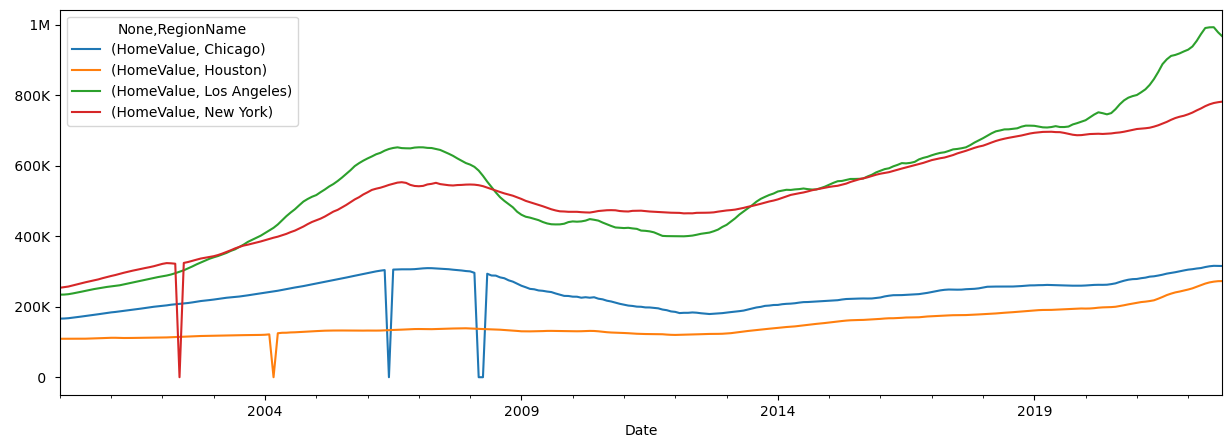

In [63]:
ax = unstacked_df.plot(figsize = (15, 5))

ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))

- Answer the following 2 questions using pandas:
1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?
    - Hint: You can use the unstacked dataframe or use pd.IndexSlice with the multiindex. 


2) How much did the home values change from November 2008 to December 2008 (in dollars)?
    - Hint: you can use .diff() to calculate the change in values